# Nearest Neighbors

`sklearn.neighbors` provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. **Supervised** neighbors-based learning comes in two flavors: **classification** for **data** with **discrete labels**, and *regression* for *data* with **continuous labels**.

The principle behind nearest neighbor methods is to **find a predefined number of training samples closest in distance to the new point, and predict the label from these.** The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (*radius*-based neighbor learning). The **distance** can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as **non-generalizing machine learning methods**, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a **non-parametric method**, it is **often successful in classification** situations **where** the d**ecision boundary is very irregular.**

The classes in `sklearn.neighbors` can handle either NumPy arrays or scipy.sparse matrices as input. *For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.*

There are many learning routines which rely on nearest neighbors at their core. One example is kernel density estimation.

## Classification

Neighbors-based classification is a type of *instance-based learning* or *non-generalizing learning*: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers: `KNeighborsClassifier` implements learning based on the $k$ nearest neighbors of each query point, where 
$k$ is an integer value specified by the user. `RadiusNeighborsClassifier` implements learning based on the number of neighbors within a fixed radius $r$ of each training point, where $r$
is a floating-point value specified by the user.

The $k$-neighbors classification in `KNeighborsClassifier` is the most commonly used technique. The optimal choice of the value $k$ is highly data-dependent: in general a larger $k$ suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in `RadiusNeighborsClassifier` can be a better choice. The user specifies a fixed radius $r$, such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. *Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit.* This can be accomplished through the `weights` keyword. The default value, `weights = 'uniform'`, assigns uniform weights to each neighbor. `weights = 'distance'` assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights.

### Example

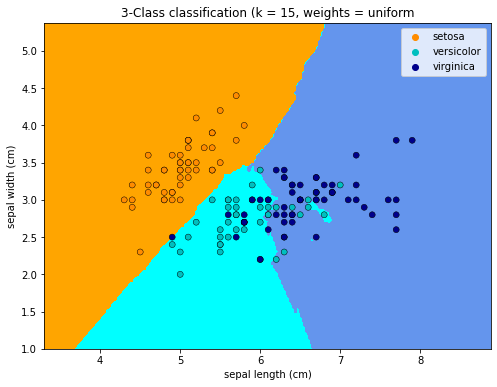

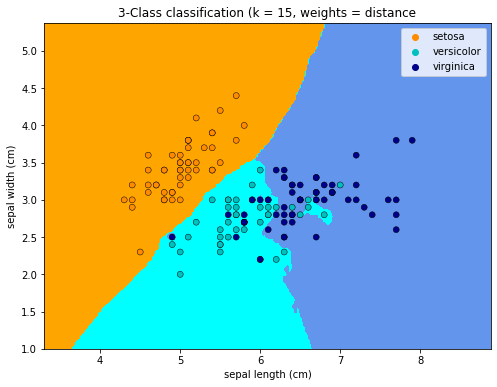

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

iris = datasets.load_iris()

#we take the first 2 features
X = iris.data[:,:2]
y = iris.target

h = 0.02 # steps size in the mesh

# create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

weights = ['uniform', 'distance']

for w in weights:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=w,)
    clf.fit(X,y)
    
    # plot the decision boundary. We will asign a color for each point
    # in the mesh [x_min, x_max] x [y_min, y_max]
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step=h), np.arange(y_min, y_max, step=h)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap = cmap_light)
    
    # Plot the training points
    sns.scatterplot(
        x=X[:,0], y=X[:,1],
        hue=iris.target_names[y],
        palette = cmap_bold,
        alpha=1.0,
        edgecolor='black',
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {n_neighbors}, weights = {w}")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [15]:
iris.target_names[y]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

## Regression
Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. **The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.**

scikit-learn implements two different neighbors regressors: `KNeighborsRegressor` implements learning based on the $k$ nearest neighbors of each query point, where $k$ is an integer value specified by the user. `RadiusNeighborsRegressor` implements learning based on the neighbors within a fixed radius $r$ of the query point, where $r$ is a floating-point value specified by the user.

The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the `weights` keyword. 
- The default value,` weights = 'uniform'`, assigns equal weights to all points. 
- `weights = 'distance'` assigns weights proportional to the inverse of the distance from the query point. 
- Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights.

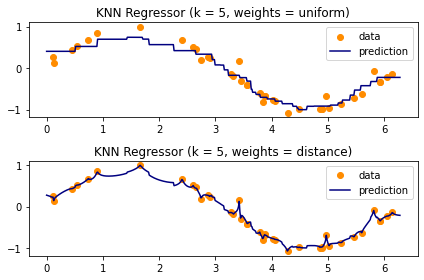

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
# generate some random points (40 points)
X = np.sort(2*np.pi*np.random.rand(40,1), axis=0) #axis along sort
T = np.linspace(0, 2*np.pi, 500)[:, np.newaxis] #points to predict
# targets
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1*(0.5 - np.random.rand(8)) #add noise every 5 points

# ###########################
# Fit regression model
n_neighbors = 5

weights = ['uniform', 'distance']

for i, w in enumerate(weights):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=w)
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2,1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title(f"KNN Regressor (k = {n_neighbors}, weights = {w})")
    
plt.tight_layout()
plt.show()

In [21]:
np.linspace(0, 5, 500)[:, np.newaxis].shape

(500, 1)

In [26]:
(np.random.rand(40,1) < 0).sum()

0

## See algorithms at https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms 